In [2]:
from pprint import pprint
import time
import requests
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from config import rapidapi_key
import datetime
import math
import numpy as np

# COVID-19 Data

In [3]:
#reading in covid19 data

time_series_ncov_Confirmed =pd.read_csv('../../mvp/data/covid19_data/time_series-ncov-Confirmed.csv')
time_series_ncov_Deaths = pd.read_csv('../../mvp/data/covid19_data/time_series-ncov-Deaths.csv')
time_series_ncov_Recovered =pd.read_csv('../../mvp/data/covid19_data/time_series-ncov-Recovered.csv')

#Removing Unecessary Columns in each data frame
time_series_ncov_Confirmed =time_series_ncov_Confirmed.drop(columns =['Province/State'])
time_series_ncov_Deaths =time_series_ncov_Deaths.drop(columns =['Province/State'])
time_series_ncov_Recovered =time_series_ncov_Recovered.drop(columns =['Province/State'])
time_series_ncov_Confirmed.head()

#Removing unecessary rows in each data set

time_series_ncov_Confirmed =time_series_ncov_Confirmed.drop([0], axis = 0)
time_series_ncov_Deaths =time_series_ncov_Deaths.drop([0], axis = 0)
time_series_ncov_Recovered =time_series_ncov_Recovered.drop([0], axis = 0)


# Changing all value columns to numeric for analysis
time_series_ncov_Confirmed["Value"] = pd.to_numeric(time_series_ncov_Confirmed["Value"])
time_series_ncov_Deaths["Value"] = pd.to_numeric(time_series_ncov_Deaths["Value"])
time_series_ncov_Recovered["Value"] = pd.to_numeric(time_series_ncov_Recovered["Value"])


time_series_ncov_Confirmed["Date"] = pd.to_datetime(time_series_ncov_Confirmed["Date"])
time_series_ncov_Deaths["Date"] = pd.to_datetime(time_series_ncov_Deaths["Date"])
time_series_ncov_Recovered["Date"] = pd.to_datetime(time_series_ncov_Recovered["Date"])

time_series_ncov_Confirmed.dtypes

#Renaming value columns to be easier to analyze

time_series_ncov_Confirmed= time_series_ncov_Confirmed.rename(columns ={'Value':'Confirmed Cases'})
time_series_ncov_Deaths= time_series_ncov_Deaths.rename(columns ={'Value':'Deaths'})
time_series_ncov_Recovered= time_series_ncov_Recovered.rename(columns ={'Value':'Recoveries'})
time_series_ncov_Confirmed.head()

,Country/Region,Lat,Long,Date,Confirmed Cases
1,Afghanistan,33.0,65.0,2020-03-26,94
2,Afghanistan,33.0,65.0,2020-03-25,84
3,Afghanistan,33.0,65.0,2020-03-24,74
4,Afghanistan,33.0,65.0,2020-03-23,40
5,Afghanistan,33.0,65.0,2020-03-22,40


In [4]:
#Grouping all dataframes by country/region and the date to get total values for each data set

time_series_nconv_Confirmed = time_series_ncov_Confirmed.groupby(['Country/Region','Date']).sum()['Confirmed Cases']
time_series_nconv_Deaths = time_series_ncov_Deaths.groupby(['Country/Region','Date']).sum()['Deaths']
time_series_nconv_Recovered = time_series_ncov_Recovered.groupby(['Country/Region','Date']).sum()['Recoveries']

confirmed_all = pd.DataFrame({
    "Confirmed Cases": time_series_nconv_Confirmed,
    "Deaths": time_series_nconv_Deaths,
    "Recoveries": time_series_nconv_Recovered
})


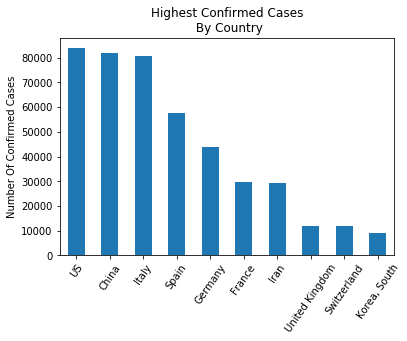

In [5]:
sort_conf = confirmed_all.sort_values(by="Confirmed Cases",ascending=False)
sort_conf = sort_conf.reset_index("Country/Region")

sort_conf = sort_conf.loc['2020-03-26']
sort_conf = sort_conf.set_index("Country/Region")
top_10_conf= sort_conf["Confirmed Cases"].iloc[0:10]

top_10_confirm_fig = plt.figure()
ax1 = top_10_conf.plot.bar(rot=55)
plt.title("Highest Confirmed Cases\n By Country")
plt.ylabel("Number Of Confirmed Cases")
plt.xlabel("")
plt.show()
top_10_confirm_fig.savefig("COVID_Vs_Stock_Pics/Top_10_Confirmed_Cases_By_Country.png",bbox_inches='tight')

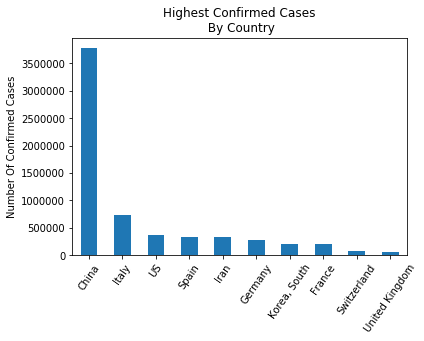

In [7]:
confirm_fig = plt.figure()
con = confirmed_all.reset_index(level = ("Date","Country/Region"))
con = con.groupby("Country/Region").sum()["Confirmed Cases"]
con =con.sort_values(ascending =False)
con = con.iloc[0:10]
con_df = pd.DataFrame({
    "Country": con
})
ax1 = con_df["Country"].plot.bar(rot=55)
plt.title("Highest Confirmed Cases\n By Country")
plt.ylabel("Number Of Confirmed Cases")
plt.xlabel("")
plt.show()
confirm_fig.savefig("Confirmed_Cases_By_Country.png",bbox_inches='tight')

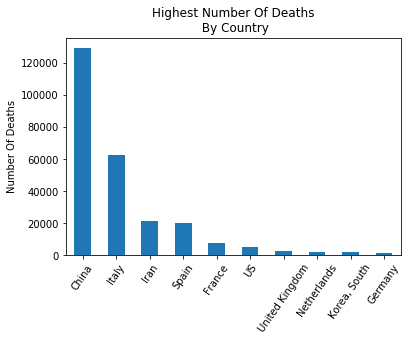

In [9]:
confirm_fig = plt.figure()
con = confirmed_all.reset_index(level = ("Date","Country/Region"))
con = con.groupby("Country/Region").sum()["Deaths"]
con =con.sort_values(ascending =False)
con = con.iloc[0:10]
con_df = pd.DataFrame({
    "Country": con
})
ax1 = con_df["Country"].plot.bar(rot=55)
plt.title("Highest Number Of Deaths\n By Country")
plt.ylabel("Number Of Deaths")
plt.xlabel("")
plt.show()
confirm_fig.savefig("Deaths_By_Country.png",bbox_inches='tight')

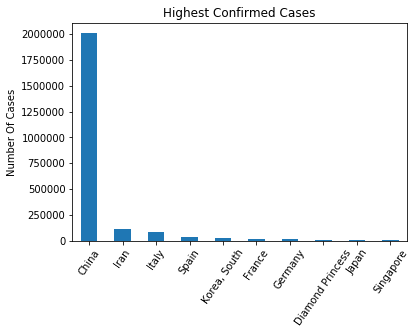

In [10]:
confirm_fig = plt.figure()
con = confirmed_all.reset_index(level = ("Date","Country/Region"))
con = con.groupby("Country/Region").sum()["Recoveries"]
con =con.sort_values(ascending =False)
con = con.iloc[0:10]
con_df = pd.DataFrame({
    "Country": con
})
ax1 = con_df["Country"].plot.bar(rot=55)
plt.title("Highest Confirmed Cases")
plt.ylabel("Number Of Cases")
plt.xlabel("")
plt.show()
confirm_fig.savefig("Recoveries_By_Country.png")

In [ ]:
confirm_fig = plt.figure()
con = confirmed_all.reset_index(level = ("Date","Country/Region"))
con = con.groupby("Country/Region").sum()["Confirmed Cases"]
con =con.sort_values(ascending =False)
con = con.iloc[0:10]
con_df = pd.DataFrame({
    "Country": con
})
ax1 = con_df["Country"].plot.bar(rot=55)
plt.title("Highest Confirmed Cases")
plt.ylabel("Number Of Cases")
plt.xlabel("")
plt.show()
confirm_fig.savefig("Confirmed_Cases_By_Country.png")

# Italy

## COVID-19 Analysis

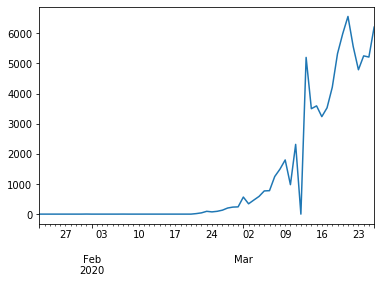

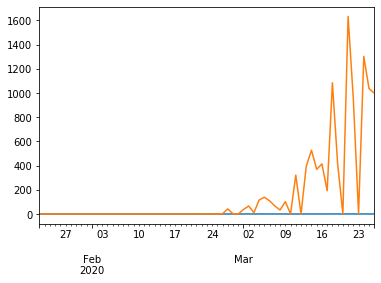

In [36]:
#Creating DataFrame with only Italian Data
italy_df = confirmed_all.loc["Italy"]

#Creating lists that will turn into columns in the italy_df
new_confirmed_cases =[]
new_deaths =[]
new_recoveries = []

confirm_count = 0
death_count = 0
recovery_count = 0

#Turned each column into list in order to iterate through them and create
# new columns with daily counts

confirmed_cases_list = italy_df['Confirmed Cases'].to_list()
deaths_list = italy_df['Deaths'].to_list()
recoveries_list = italy_df['Recoveries'].to_list()

for i in confirmed_cases_list:
    new_confirm = i-confirm_count
    new_confirmed_cases.append(new_confirm)
    confirm_count = i

for k in deaths_list:
    new_dead = k-death_count
    new_deaths.append(new_dead)
    death_count = k

for j in recoveries_list:
    new_recover = j-recovery_count
    new_recoveries.append(new_recover)
    recovery_count = j

#Creating the new columns
italy_df["New Confirmed Cases"]= new_confirmed_cases
italy_df["New Deaths"]= new_deaths
italy_df["New Recoveries"]= new_recoveries
italy_df["Recovery Rate"] = italy_df["New Recoveries"] / italy_df["New Confirmed Cases"]
italy_df["Recovery Rate"] = italy_df["Recovery Rate"].fillna(0)

italy_df.head()
italy_df["New Confirmed Cases"].plot()
#italy_df["Confirmed Cases"].plot()
plt.xlabel("")
plt.show()
# italy_df["New Confirmed Cases"].plot()
italy_df["Recovery Rate"].plot()
italy_df['New Recoveries'].plot()
plt.xlabel("")
plt.show()

<Figure size 432x288 with 0 Axes>

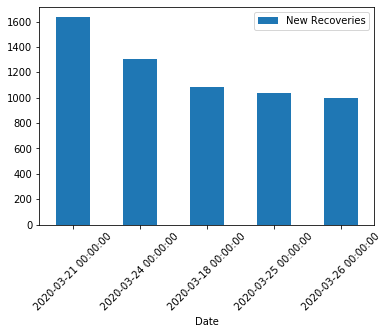

In [37]:
import matplotlib.dates as mdates
italy_sort_new_recovery = italy_df.sort_values(by="New Recoveries",ascending = False)

fig = plt.figure()
plt.show()

italy_sort_new_recovery.iloc[0:5].plot(kind = 'bar',y='New Recoveries',rot=45)

#plt.gca().invert_yaxis()

In [38]:
#DataFrame without Date indexed
italy_no_date_df = italy_df.reset_index(level='Date')
italy_no_date_df.dtypes

Date                   datetime64[ns]
Confirmed Cases                 int64
Deaths                          int64
Recoveries                      int64
New Confirmed Cases             int64
New Deaths                      int64
New Recoveries                  int64
Recovery Rate                 float64
dtype: object

## Italian Stock Data

In [76]:
italy_df.dtypes

Confirmed Cases          int64
Deaths                   int64
Recoveries               int64
New Confirmed Cases      int64
New Deaths               int64
New Recoveries           int64
Recovery Rate          float64
dtype: object

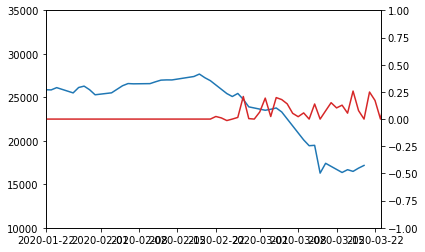

In [40]:
italy_market_df = pd.read_csv("italy_index/FTSE Italia All Share Historical Data.csv")
italy_market_df["Date"]=pd.to_datetime(italy_market_df["Date"])

# start_date = datetime.datetime(2020,1,22)
# end_date = datetime.datetime(2020,3,23)
# mask = (italy_market_df['Date'] >= start_date) & (italy_market_df['Date'] <= end_date)
# mask2 = (italy_no_date_df['Date'] >= start_date) & (italy_no_date_df['Date'] <= end_date)

#italy_market_df.loc[mask]["Date"]
#print(italy_no_date_df.loc[mask2])
fig,ax1 = plt.subplots()
ax1.plot(italy_market_df["Date"],italy_market_df["Price"])
plt.xlim(datetime.date(2020,1,22),datetime.date(2020,3,23))
plt.ylim(10000,35000)

ax2=ax1.twinx()

ax2.plot(italy_no_date_df["Date"],italy_no_date_df["Recovery Rate"],color = 'tab:red')
plt.ylim(-1,1)
plt.show()



# China

## COVID-19 Analysis

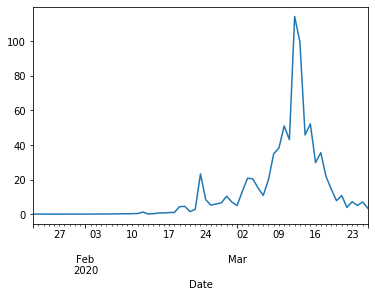

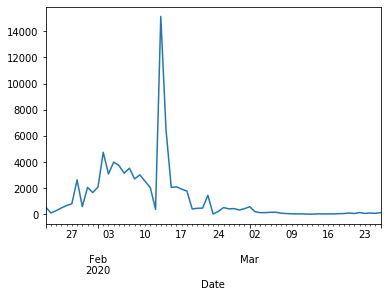

In [41]:
china_df = confirmed_all.loc["China"]

confirm_count = 0
death_count = 0
recovery_count = 0

new_confirmed_cases =[]
new_deaths =[]
new_recoveries = []

confirmed_cases_list = china_df['Confirmed Cases'].to_list()
deaths_list = china_df['Deaths'].to_list()
recoveries_list = china_df['Recoveries'].to_list()

for i in confirmed_cases_list:
    new_confirm = i-confirm_count
    new_confirmed_cases.append(new_confirm)
    confirm_count = i

for k in deaths_list:
    new_dead = k-death_count
    new_deaths.append(new_dead)
    death_count = k

for j in recoveries_list:
    new_recover = j-recovery_count
    new_recoveries.append(new_recover)
    recovery_count = j

china_df["New Confirmed Cases"]= new_confirmed_cases
china_df["New Deaths"]= new_deaths
china_df["New Recoveries"]= new_recoveries

china_df["Recovery Rate"] = china_df["New Recoveries"] / china_df["New Confirmed Cases"]

china_no_date_df = china_df.reset_index(level='Date')
china_no_date_df.dtypes

china_df["Recovery Rate"].plot()
# china_df["New Confirmed Cases"].plot()
plt.show()
china_df["New Confirmed Cases"].plot()
plt.show()
# china_df["New Confirmed Cases"]

## China Stock Data

### Shanghai Stock Exchange

In [42]:
ticker_symbol = "000001.SS"
curr_time = int(time.time())

import requests

url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/stock/get-histories"

querystring = {"region":"US","lang":"en","symbol":ticker_symbol,"from":"1575176400","to":curr_time,"events":"div","interval":"1d"}

headers = {
    'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com",
    'x-rapidapi-key': "b477e42517mshf0183273bba2e47p1544cbjsnc7d400ac9422"
    }

response2 = requests.request("GET", url, headers=headers, params=querystring)



In [43]:
timestamp = response2.json()['chart']['result'][0]['timestamp']
year_close = response2.json()['chart']['result'][0]['indicators']['quote'][0]['close']
year_open =response2.json()['chart']['result'][0]['indicators']['quote'][0]['open']
year_volume =response2.json()['chart']['result'][0]['indicators']['quote'][0]['volume']
year_adjclose =response2.json()['chart']['result'][0]['indicators']['adjclose'][0]['adjclose']

sseDict = {"Timestamp":timestamp,
           "Open":year_open,
          "Close":year_close,
           "Volume":year_volume,
          "Adjclose":year_adjclose
          }
sse_df = pd.DataFrame(sseDict)

sse_df['Change %'] = (sse_df['Close']-sse_df['Open'])/sse_df['Open']

convert_date = []
convert_date = [datetime.datetime.utcfromtimestamp(sse_df['Timestamp'][x]).strftime('%Y-%m-%d') for x in range(0,len(sse_df['Timestamp']))]
sse_df['Date'] = convert_date

sse_df['Last Year'] =[datetime.datetime.strptime(sse_df['Date'][x],'%Y-%m-%d')-datetime.timedelta(365) for x in range(0,len(sse_df['Date']))]
sse_df

,Timestamp,Open,Close,Volume,Adjclose,Change %,Date,Last Year
0,1575250200,2874.449951,2875.810059,1.288000e+05,2875.810059,0.000473,2019-12-02,2018-12-02
1,1575336600,2869.879883,2884.699951,1.238000e+05,2884.699951,0.005164,2019-12-03,2018-12-03
2,1575423000,2876.907959,2878.115967,1.255000e+05,2878.115967,0.000420,2019-12-04,2018-12-04
3,1575509400,2886.516113,2899.468994,1.432000e+05,2899.468994,0.004487,2019-12-05,2018-12-05
4,1575595800,2902.278076,2912.013916,1.341000e+05,2912.013916,0.003355,2019-12-06,2018-12-06
...,...,...,...,...,...,...,...,...
73,1584927000,2677.590088,2660.169922,2.498000e+05,2660.169922,-0.006506,2020-03-23,2019-03-24
74,1585013400,2703.019043,2722.437988,2.570000e+05,2722.437988,0.007184,2020-03-24,2019-03-25
75,1585099800,2775.302979,2781.591064,2.731000e+05,2781.591064,0.002266,2020-03-25,2019-03-26
76,1585186200,2761.895996,2764.910889,2.341000e+05,2764.910889,0.001092,2020-03-26,2019-03-27


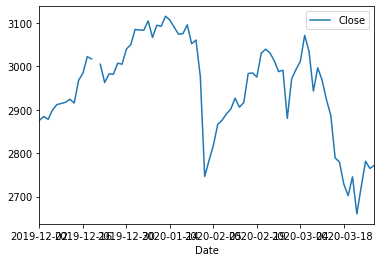

In [45]:
sse_df.plot(x ='Date',y='Close')



# US

## COVID-19 Analysis

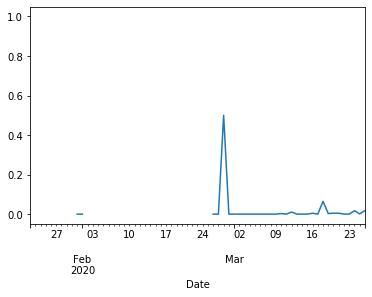

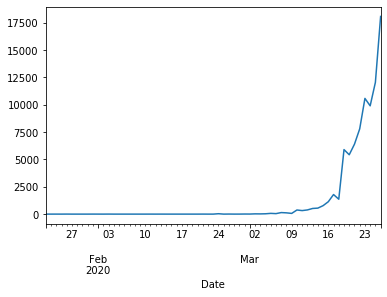

Date                   datetime64[ns]
Confirmed Cases                 int64
Deaths                          int64
Recoveries                      int64
New Confirmed Cases             int64
New Deaths                      int64
New Recoveries                  int64
Recovery Rate                 float64
dtype: object

In [70]:
us_df = confirmed_all.loc["US"]

confirm_count = 0
death_count = 0
recovery_count = 0

new_confirmed_cases =[]
new_deaths =[]
new_recoveries = []

confirmed_cases_list = us_df['Confirmed Cases'].to_list()
deaths_list = us_df['Deaths'].to_list()
recoveries_list = us_df['Recoveries'].to_list()

for i in confirmed_cases_list:
    new_confirm = i-confirm_count
    new_confirmed_cases.append(new_confirm)
    confirm_count = i

for k in deaths_list:
    new_dead = k-death_count
    new_deaths.append(new_dead)
    death_count = k

for j in recoveries_list:
    new_recover = j-recovery_count
    new_recoveries.append(new_recover)
    recovery_count = j

us_df["New Confirmed Cases"]= new_confirmed_cases
us_df["New Deaths"]= new_deaths
us_df["New Recoveries"]= new_recoveries

us_df["Recovery Rate"] = us_df["New Recoveries"] / us_df["New Confirmed Cases"]

us_no_date_df = us_df.reset_index(level='Date')
us_no_date_df.dtypes

us_df["Recovery Rate"].plot()
# china_df["New Confirmed Cases"].plot()
plt.show()
us_df["New Confirmed Cases"].plot()
plt.show()
# china_df["New Confirmed Cases"]


## US Stock Data

## S&P 500

In [68]:
ticker_symbol = "^GSPC"
curr_time = int(time.time())
import requests

url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/stock/get-histories"

querystring = {"region":"US","lang":"en","symbol":ticker_symbol,"from":"1575176400","to":curr_time,"events":"div","interval":"1d"}

headers = {
    'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com",
    'x-rapidapi-key': "b477e42517mshf0183273bba2e47p1544cbjsnc7d400ac9422"
    }

response2 = requests.request("GET", url, headers=headers, params=querystring)
timestamp = response2.json()['chart']['result'][0]['timestamp']
year_close = response2.json()['chart']['result'][0]['indicators']['quote'][0]['close']
year_open =response2.json()['chart']['result'][0]['indicators']['quote'][0]['open']
year_volume =response2.json()['chart']['result'][0]['indicators']['quote'][0]['volume']
year_adjclose =response2.json()['chart']['result'][0]['indicators']['adjclose'][0]['adjclose']

usspDict = {"Timestamp":timestamp,
           "Open":year_open,
          "Close":year_close,
           "Volume":year_volume,
          "Adjclose":year_adjclose
          }
ussp_df = pd.DataFrame(usspDict)

ussp_df['Change %'] = (ussp_df['Close']-ussp_df['Open'])/ussp_df['Open']

convert_date = []
convert_date = [datetime.datetime.utcfromtimestamp(ussp_df['Timestamp'][x]).strftime('%Y-%m-%d') for x in range(0,len(ussp_df['Timestamp']))]
ussp_df['Date'] = convert_date

ussp_df['Last Year'] =[datetime.datetime.strptime(ussp_df['Date'][x],'%Y-%m-%d')-datetime.timedelta(365) for x in range(0,len(ussp_df['Date']))]


Timestamp             int64
Open                float64
Close               float64
Volume                int64
Adjclose            float64
Change %            float64
Date                 object
Last Year    datetime64[ns]
dtype: object

ConversionError: Failed to convert value(s) to axis units: datetime.date(2020, 1, 22)

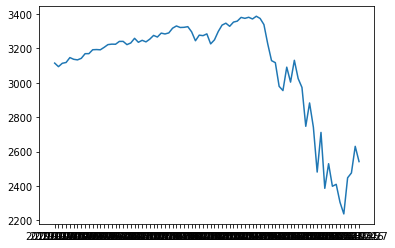

In [98]:
fig,ax1 = plt.subplots()
ax1.plot(ussp_df['Date'],ussp_df['Close'])
plt.xlim(datetime.date(2020,1,22),datetime.date(2020,3,26))

## Dow Jones Industrial Average

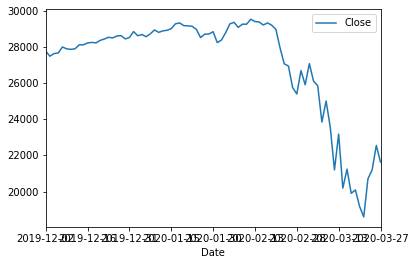

In [89]:
ticker_symbol = "^DJI"
curr_time = int(time.time())
import requests

url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/stock/get-histories"

querystring = {"region":"US","lang":"en","symbol":ticker_symbol,"from":"1575176400","to":curr_time,"events":"div","interval":"1d"}

headers = {
    'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com",
    'x-rapidapi-key': "b477e42517mshf0183273bba2e47p1544cbjsnc7d400ac9422"
    }

response2 = requests.request("GET", url, headers=headers, params=querystring)
timestamp = response2.json()['chart']['result'][0]['timestamp']
year_close = response2.json()['chart']['result'][0]['indicators']['quote'][0]['close']
year_open =response2.json()['chart']['result'][0]['indicators']['quote'][0]['open']
year_volume =response2.json()['chart']['result'][0]['indicators']['quote'][0]['volume']
year_adjclose =response2.json()['chart']['result'][0]['indicators']['adjclose'][0]['adjclose']

usdjDict = {"Timestamp":timestamp,
           "Open":year_open,
          "Close":year_close,
           "Volume":year_volume,
          "Adjclose":year_adjclose
          }
usdj_df = pd.DataFrame(usdjDict)

usdj_df['Change %'] = (usdj_df['Close']-usdj_df['Open'])/usdj_df['Open']

convert_date = []
convert_date = [datetime.datetime.utcfromtimestamp(usdj_df['Timestamp'][x]).strftime('%Y-%m-%d') for x in range(0,len(usdj_df['Timestamp']))]
usdj_df['Date'] = convert_date

usdj_df['Last Year'] =[datetime.datetime.strptime(usdj_df['Date'][x],'%Y-%m-%d')-datetime.timedelta(365) for x in range(0,len(usdj_df['Date']))]

usdj_df.plot(x ='Date',y='Close')

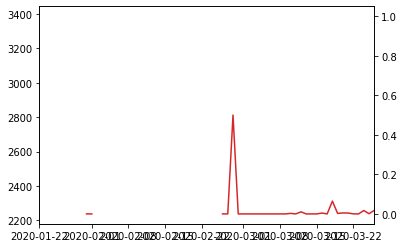

In [95]:
fig,ax1 = plt.subplots()
ax1.plot(ussp_df["Close"])
plt.xlim(datetime.date(2020,1,22),datetime.date(2020,3,26))
#plt.ylim(10000,35000)

ax2=ax1.twinx()

ax2.plot(us_no_date_df["Date"],us_no_date_df["Recovery Rate"],color = 'tab:red')
#plt.ylim(-1,1)
plt.show()

